<a href="https://colab.research.google.com/github/PranavanBupathy/Weather-forecasting-using-neural-prophet/blob/main/Time_series_weather_forecasting_using_neural_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook is about Australian weather forecasting usign the timeseries model  
1. Preprocessing a weather dataset from kaggle using pandas
2. Training a timeseries forcasting model to predict temperature using neural prophet
3. Forecasting temperature into the future using the trained model

neural prophet : https://arxiv.org/abs/2111.15397?fbclid=IwAR2vCkHYiy5yuPPjWXpJgAJs-uD5NkH4liORt1ch4a6X_kmpMqagGtXyez4

# Install and Import Dependencies

In [1]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 4.3 MB/s 
     |████████████████████████████████| 179 kB 66.5 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [4]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle #Used for serializing and deserializing 

# Read in Data and process data

In [12]:
data = "/content/weatherAUS.csv"

In [15]:
df = pd.read_csv(data)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [16]:
df.Location.unique() # retreive all the unique value

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [18]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [19]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [21]:
#preprocessing
#taking only the melborne location and with date going to predict the temperature at 3pm

In [29]:
melb = df[df['Location']=='Melbourne'] #Filtered and taken only the melbourne location
melb['Date'] = pd.to_datetime(melb['Date']) #Converting the data column to date column datatype
melb.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [31]:
melb.dtypes # This is done because the neuralprophet needs the 2 value as input. 

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

There is the missing data from 2015 to 2016

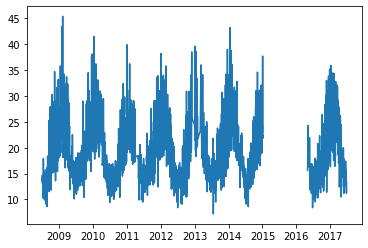

In [34]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

If there is a large missing data then it's better to remove also passing the missing data into the neural prophet doesn't support

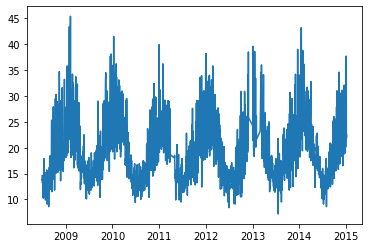

In [36]:
melb['Year'] = melb['Date'].apply(lambda x: x.year) #Grabed year from date column and loops and extract the year value.
melb = melb[melb['Year']<=2015] #filter by year
plt.plot(melb['Date'],melb['Temp3pm'])
plt.show()


In [37]:
melb.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


Now filteraing the dates and the temperature at 3pm only

In [40]:
data = melb[['Date', 'Temp3pm']]
data.dropna(inplace=True) # dropping all missing values
data.columns = ['ds','y'] #renaming the column
data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


#Train the model
Three main parameter in this model which are input data, frequency which means the data are daily or the frequency pattern of the data, Epoch which tell the number of training cycle to follow in this learning.

In [46]:
m = NeuralProphet()
m.fit(data, freq='D') 


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.01E-02, min: 2.38E+00


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.05E-01, min: 7.98E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.83E-02
Epoch[152/152]: 100%|██████████| 152/152 [00:18<00:00,  8.14it/s, SmoothL1Loss=0.0145, MAE=3.02, RMSE=3.92, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.902984,31.035616,38.172177,0.0
1,0.760349,27.484415,33.774321,0.0
2,0.591368,23.155275,28.357687,0.0
3,0.389043,17.720052,21.768891,0.0
4,0.181122,11.383432,14.055265,0.0
...,...,...,...,...
147,0.014492,3.018165,3.938907,0.0
148,0.014495,3.026974,3.936073,0.0
149,0.014463,3.020664,3.937602,0.0
150,0.014458,3.018702,3.928539,0.0


Mean absolute error in degree + or -

#Forecasting

In [51]:
future = m.make_future_dataframe(data, periods=900) # predicting the value to certain period of time with tuneable value of period.
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.405857,NaN,20.684919,5.443387,0.277549
1,2015-01-07,None,26.231007,NaN,20.688053,5.582411,-0.039457
2,2015-01-08,None,26.472511,NaN,20.691189,5.717635,0.063686
3,2015-01-09,None,26.592915,NaN,20.694323,5.848347,0.050243
4,2015-01-10,None,26.668663,NaN,20.697460,5.973865,-0.002661


In [52]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
895,2017-06-19,None,17.357773,NaN,23.490463,-5.804137,-0.328554
896,2017-06-20,None,17.916790,NaN,23.493599,-5.854357,0.277549
897,2017-06-21,None,17.557207,NaN,23.496731,-5.900066,-0.039457
898,2017-06-22,None,17.622311,NaN,23.499866,-5.941243,0.063686
899,2017-06-23,None,17.575352,NaN,23.503002,-5.977894,0.050243


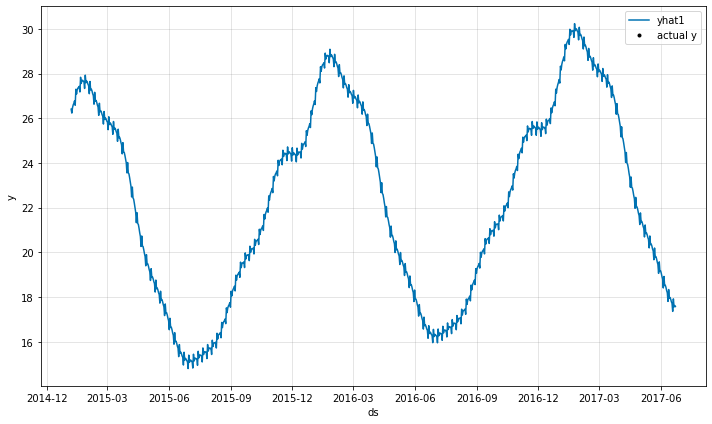

In [53]:
plot1 = m.plot(forecast)

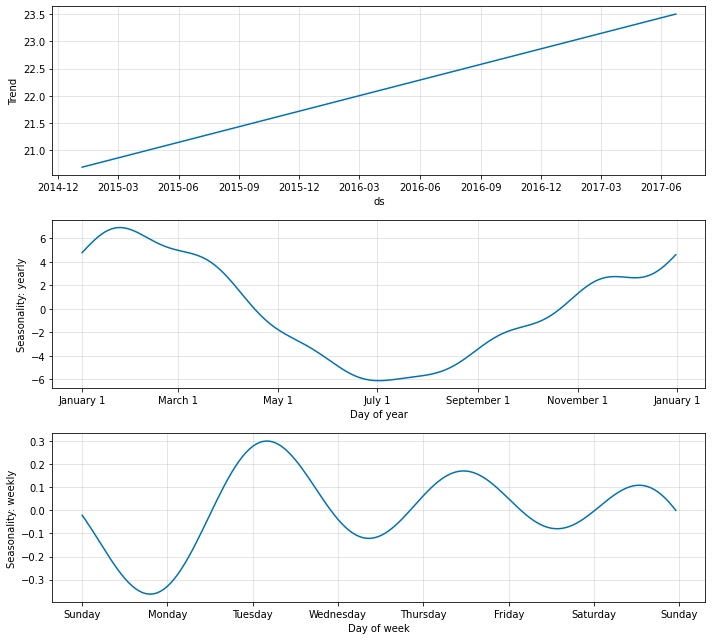

In [55]:
plot2 = m.plot_components(forecast)

# Infernece:
1. The Trend line shows the linear increase of temperature over the years
2. Seasonality over the years shows there is decline from jan to july then raise from july to jan next year.
3. seasonality of weekly shows no much changes.